In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import wrangle

# Acquire

In [2]:
# Read the red and white wine DataFrames
red_df = pd.read_csv('https://query.data.world/s/km3v7y3hbhnq6q3qxmgunsty22chem?dws=00000')
white_df = pd.read_csv('https://query.data.world/s/tzchvcxc66f2wiye4k3x3agz2vthyu?dws=00000')


In [3]:
# Add a 'wine_type' column to each DataFrame
red_df['wine_type'] = 'red'
white_df['wine_type'] = 'white'

In [4]:
# Combine the DataFrames into one
df = pd.concat([red_df, white_df], ignore_index=True)

# Prepare

In [5]:
# clean up the column names:
df.columns = [
    col.lower().replace(' ','_') for col in df.columns
]

In [6]:
# Data stats show no null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   ph                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_type             6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


#### I want to which features has a relationship with quality

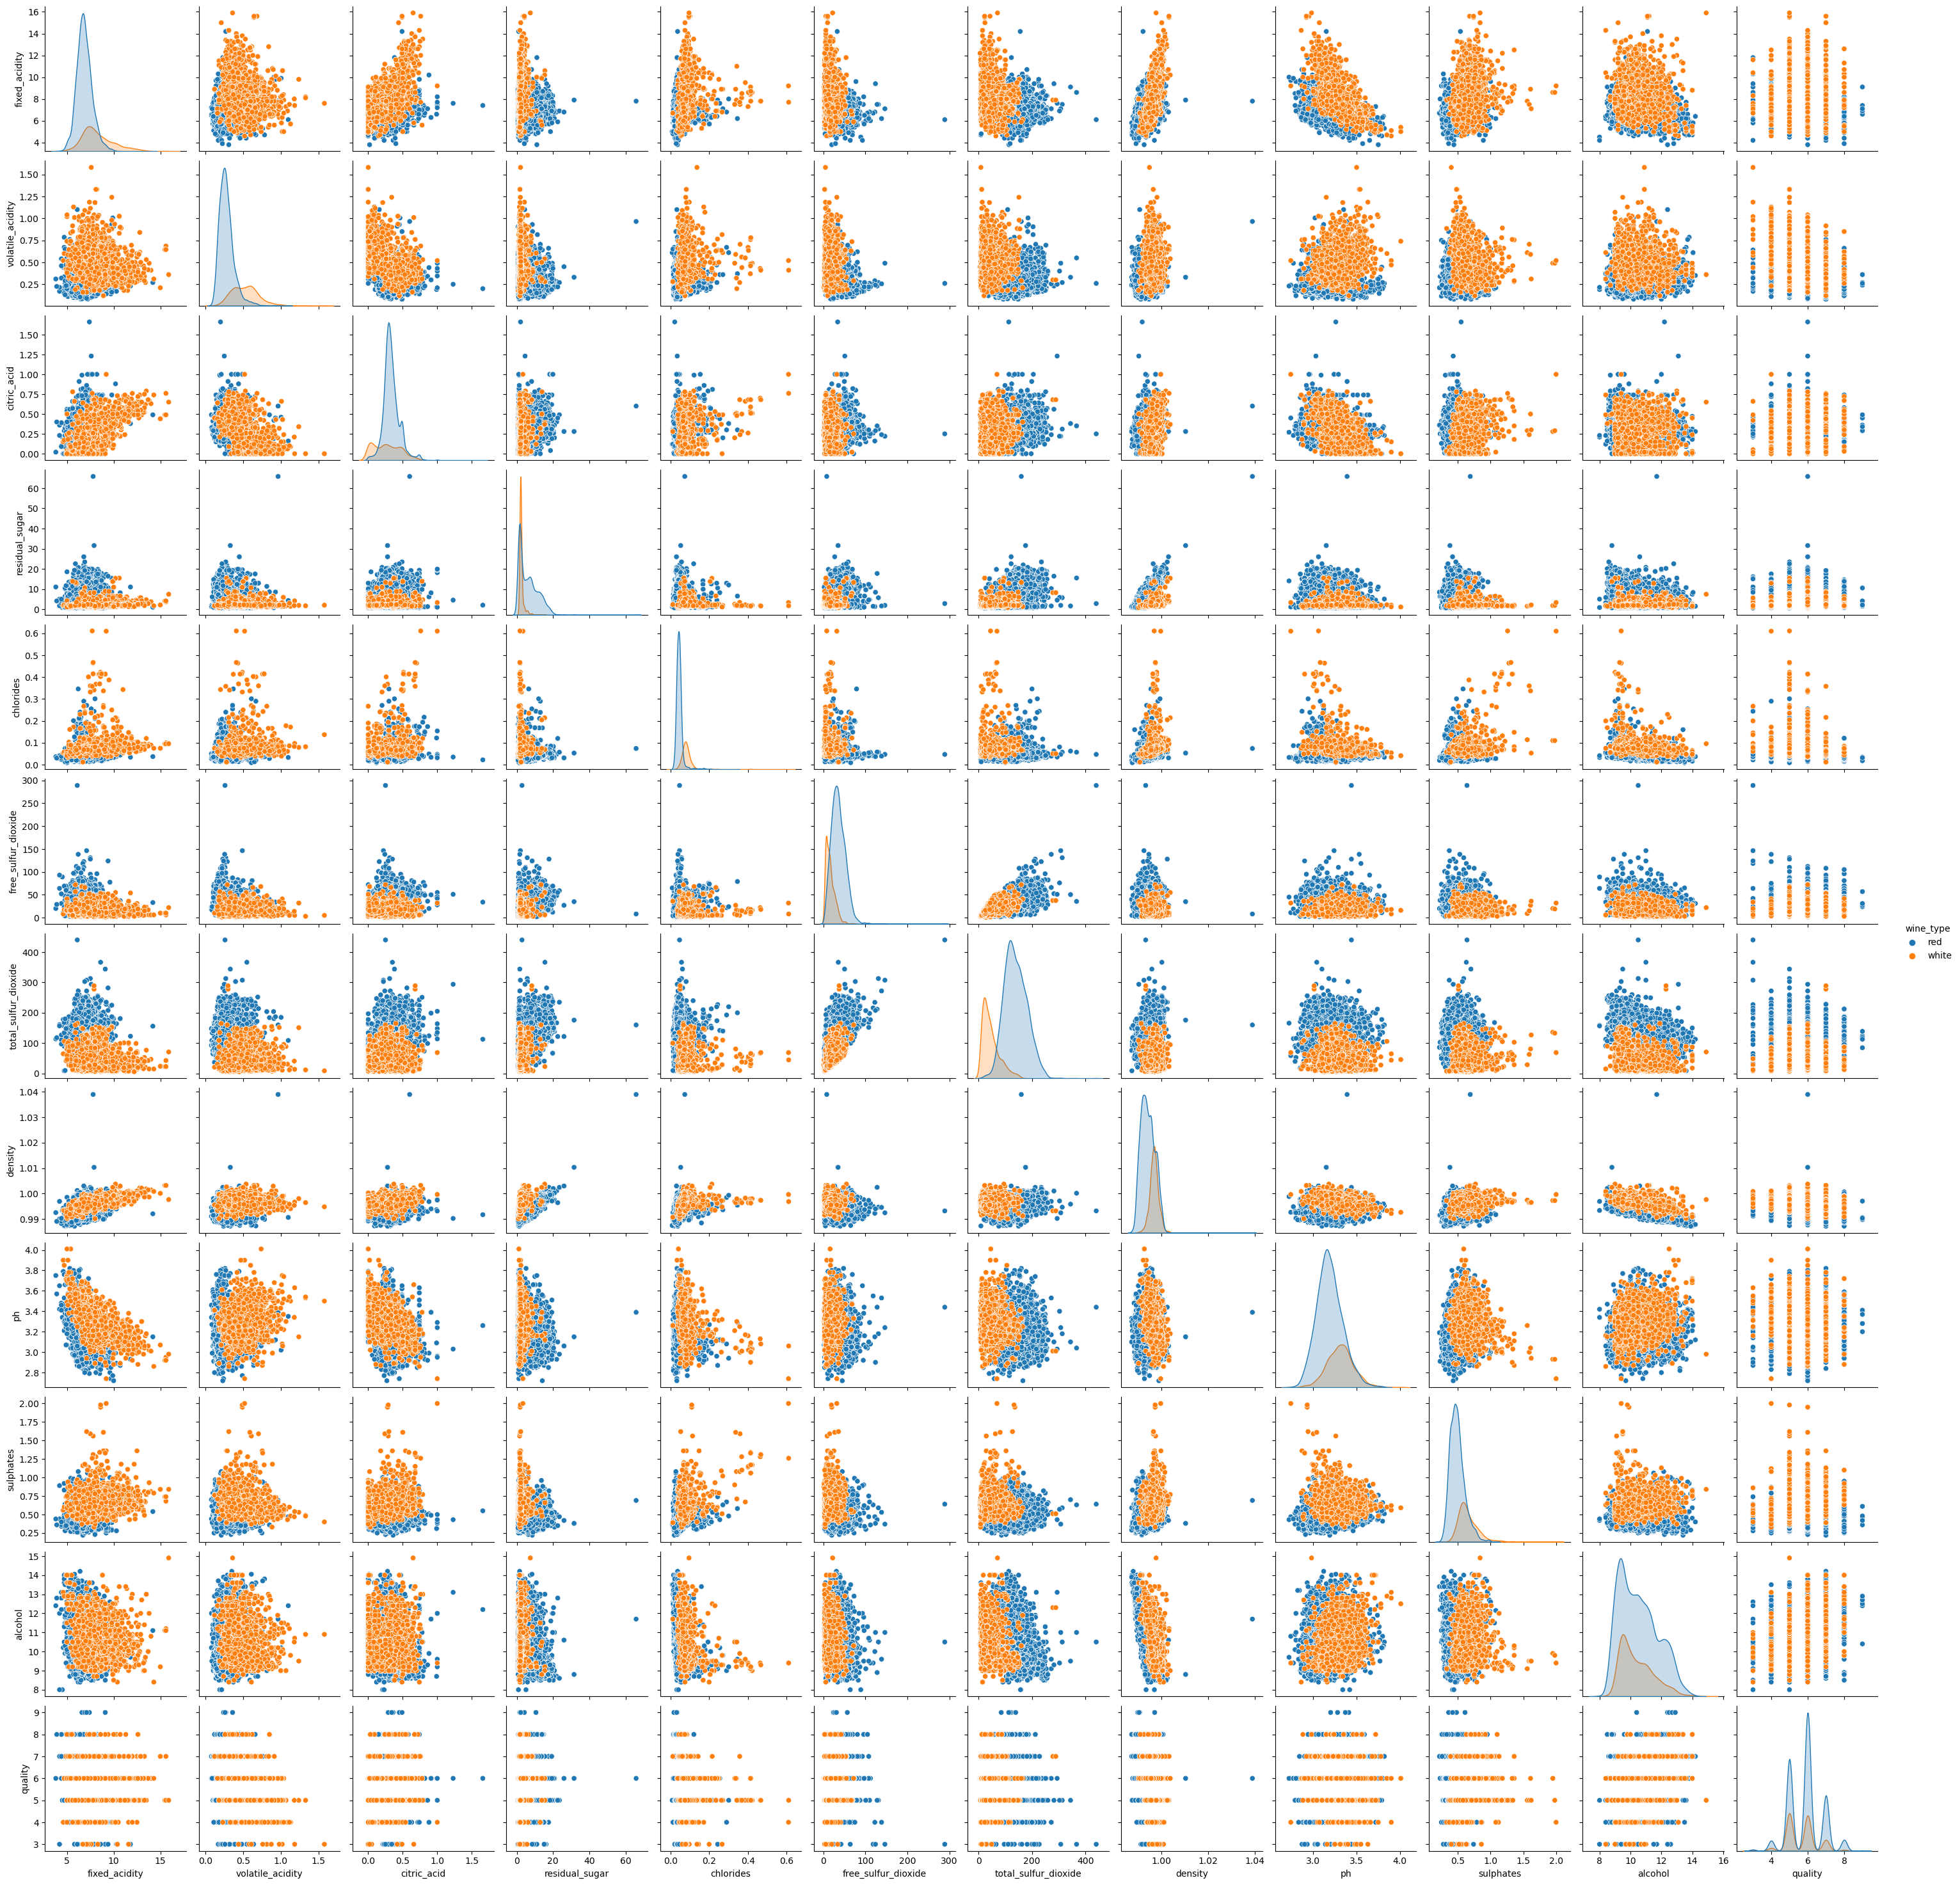

In [8]:
sns.pairplot(df, hue= 'wine_type')
plt.show()

In [17]:
# Addressing outliers by first creating fences
k = 1.5
# df.describe['.75']
q3 = df[df.columns].quantile(0.75)
q1 = df[df.columns].quantile(0.25)
iqr = q3 - q1
upper_bound = q3 + (k * iqr)
lower_bound = q1 - (k * iqr)


/var/folders/mn/mp1xhgm522gc5vhffb_k61d00000gn/T/ipykernel_31659/2372109958.py:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q3 = df[df.columns].quantile(0.75)
/var/folders/mn/mp1xhgm522gc5vhffb_k61d00000gn/T/ipykernel_31659/2372109958.py:5: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q1 = df[df.columns].quantile(0.25)


In [18]:
upper_bound

fixed_acidity             9.150000
volatile_acidity          0.545000
citric_acid               0.535000
residual_sugar           18.300000
chlorides                 0.081000
free_sulfur_dioxide      75.000000
total_sulfur_dioxide    256.500000
density                   1.002926
ph                        3.610000
sulphates                 0.820000
alcohol                  14.000000
quality                   7.500000
dtype: float64

In [19]:
lower_bound

fixed_acidity            4.750000
volatile_acidity         0.025000
citric_acid              0.095000
residual_sugar          -8.100000
chlorides                0.009000
free_sulfur_dioxide    -13.000000
total_sulfur_dioxide    -3.500000
density                  0.985316
ph                       2.810000
sulphates                0.180000
alcohol                  6.800000
quality                  3.500000
dtype: float64

In [20]:
# Define a function to filter values below lower_bound and above upper_bound
def filter_values(df, lower_bound, upper_bound):
    # Initialize an empty DataFrame to store filtered values
    filtered_df = pd.DataFrame()

    # Iterate through each column in the DataFrame
    for column in df.columns:
        # Filter values in the column based on the condition
        filtered_column = df[column][(df[column] < lower_bound) | (df[column] > upper_bound)]

        # Add the filtered column to the filtered DataFrame
        filtered_df[column] = filtered_column

    return filtered_df
filter_values(df, lower_bound, upper_bound)


#I dont' know what the hell these values mean, so I will move on to remove outliers

ValueError: Can only compare identically-labeled Series objects

In [21]:
# Addressing outliers by report

num_df = df.select_dtypes('number')
for col in num_df:
    if len(num_df[col].value_counts()) > 20:
        lower_bound, upper_bound = get_fences(df,col, k=k)
        print(f'Outliers for Col {col}:')
        print('lower: ', lower_bound, 'upper: ', upper_bound)
        print(df[col][(
            df[col] > upper_bound) | (df[col] < lower_bound)])
        print('----------')

NameError: name 'get_fences' is not defined

1. fixed_acidity: 357 outliers detected.
2. volatile_acidity: 377 outliers detected.
3. citric_acid: 509 outliers detected.
4. residual_sugar: 118 outliers detected.
5. chlorides: 286 outliers detected.
6. free_sulfur_dioxide: 62 outliers detected.
7. total_sulfur_dioxide: 10 outliers detected.
8. density: 3 outliers detected.
9. pH: 73 outliers detected.
10. sulphates: 191 outliers detected.
11. alcohol: 3 outliers detected.

* note that there are no outliers in quality. why?

3 options are :

Removing outliers if they are data entry errors or anomalies that do not represent valid data.
Transforming the data using techniques like winsorization to bring extreme values closer to the range of typical values.
Treating outliers separately if they have a valid explanation or significance in your analysis.

In [14]:
# to be lazy so I am removing all outliers
# This code iterates through each column and keeps 
# only the rows that fall within the specified lower and upper bound
lower_bounds = {
    'fixed_acidity': 4.450000000000001,
    'volatile_acidity': -0.024999999999999994,
    'citric_acid': 0.03999999999999998,
    'residual_sugar': -7.6499999999999995,
    'chlorides': -0.002500000000000009,
    'free_sulfur_dioxide': -19.0,
    'total_sulfur_dioxide': -41.5,
    'density': 0.9853649999999999,
    'ph': 2.795,
    'sulphates': 0.175,
    'alcohol': 6.799999999999999,
    'quality': 3.5
}


upper_bounds = {
    'fixed_acidity': 9.65,
    'volatile_acidity': 0.655,
    'citric_acid': 0.6000000000000001,
    'residual_sugar': 17.549999999999997,
    'chlorides': 0.10550000000000001,
    'free_sulfur_dioxide': 77.0,
    'total_sulfur_dioxide': 274.5,
    'density': 1.003965,
    'ph': 3.635,
    'sulphates': 0.855,
    'alcohol': 14.000000000000002,
    'quality': 7.5
}



for column in lower_bounds.keys():
    df = df[(df[column] >= lower_bounds[column]) & (df[column] <= upper_bounds[column])]


In [15]:
num_df = df.select_dtypes('number')
for col in num_df:
    if len(num_df[col].value_counts()) > 20:
        lower_bound, upper_bound = get_fences(df,col, k=k)
        print(f'Outliers for Col {col}:')
        print('lower: ', lower_bound, 'upper: ', upper_bound)
        print(df[col][(
            df[col] > upper_bound) | (df[col] < lower_bound)])
        print('----------')

NameError: name 'get_fences' is not defined

fixed_acidity: 357 outliers detected.
volatile_acidity: 377 outliers detected.
citric_acid: 509 outliers detected.
residual_sugar: 118 outliers detected.
chlorides: 286 outliers detected.
free_sulfur_dioxide: 62 outliers detected.
total_sulfur_dioxide: 10 outliers detected.
density: 3 outliers detected.
pH: 73 outliers detected.
sulphates: 191 outliers detected.
alcohol: 3 outliers detected.

In [16]:
# Create a dictionary to store the information about outliers before and after removal
outlier_info = {
    'fixed_acidity': {'before': 357, 'after': 94},
    'volatile_acidity': {'before': 377, 'after': 271},
    'citric_acid': {'before': 509, 'after': 208},
    'residual_sugar': {'before': 118, 'after': 0},
    'chlorides': {'before': 286, 'after': 270},
    'free_sulfur_dioxide': {'before': 62, 'after': 2},
    'sulfur_dioxide': {'before': 10, 'after': 2},
    'density': {'before': 3, 'after': 0},
    'ph': {'before': 73, 'after': 11},
    'sulphates': {'before': 191, 'after': 20},
    'alcohol': {'before': 3, 'after': 0},
    # Add other columns and their outlier counts here
}

# Verbalize the information
for column, counts in outlier_info.items():
    before_count = counts['before']
    after_count = counts['after']
    print(f"{column}: Was {before_count} outliers detected. Now {after_count} outliers detected.")

fixed_acidity: Was 357 outliers detected. Now 94 outliers detected.
volatile_acidity: Was 377 outliers detected. Now 271 outliers detected.
citric_acid: Was 509 outliers detected. Now 208 outliers detected.
residual_sugar: Was 118 outliers detected. Now 0 outliers detected.
chlorides: Was 286 outliers detected. Now 270 outliers detected.
free_sulfur_dioxide: Was 62 outliers detected. Now 2 outliers detected.
sulfur_dioxide: Was 10 outliers detected. Now 2 outliers detected.
density: Was 3 outliers detected. Now 0 outliers detected.
ph: Was 73 outliers detected. Now 11 outliers detected.
sulphates: Was 191 outliers detected. Now 20 outliers detected.
alcohol: Was 3 outliers detected. Now 0 outliers detected.


There are left over outliers may due to statistical threshold, multivariate outliers, or robust statistics.

* again there are no outliers in quality